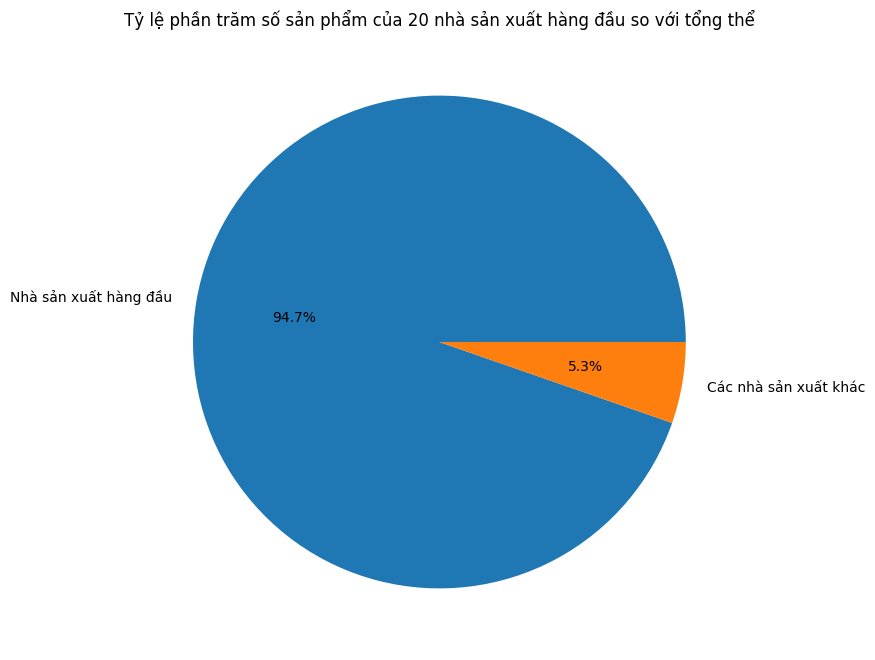

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Đếm số lượng sản phẩm của mỗi nhà sản xuất
manufacturer_counts = data['Nhà sản xuất'].value_counts()

# Sắp xếp theo số lượng sản phẩm giảm dần và chọn 30 nhà sản xuất đầu tiên
top_manufacturers = manufacturer_counts.head(20)

# Tính tỷ lệ phần trăm số sản phẩm của 30 nhà sản xuất này so với tổng thể
total_products = data.shape[0]
percentage = (top_manufacturers.sum() / total_products) * 100

# Trực quan hóa tỷ lệ phần trăm bằng biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie([percentage, 100 - percentage], labels=['Nhà sản xuất hàng đầu', 'Các nhà sản xuất khác'], autopct='%1.1f%%')
plt.title('Tỷ lệ phần trăm số sản phẩm của 20 nhà sản xuất hàng đầu so với tổng thể')
plt.show()


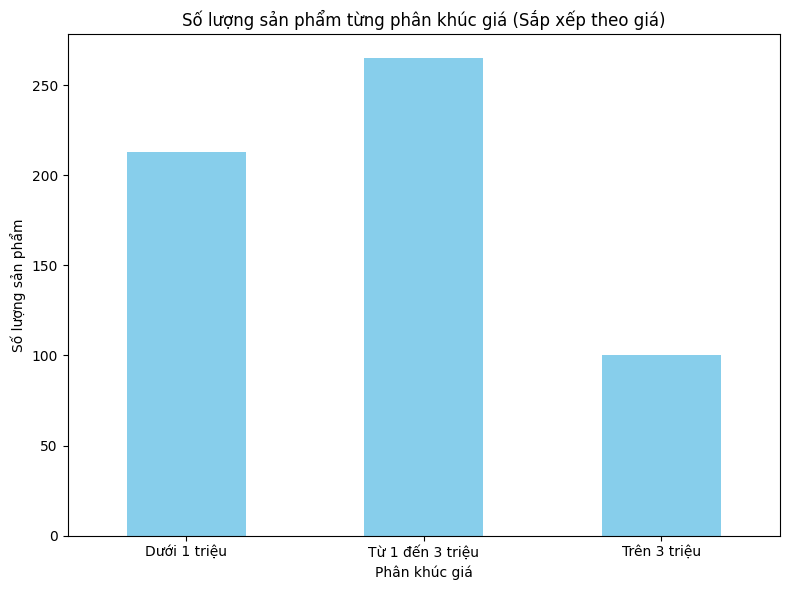

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Loại bỏ các sản phẩm có giá trị '0' và nhà sản xuất có giá trị '0'
data = data[(data['Giá(đ)'] != 0) & (data['Nhà sản xuất'] != '0')]

# Tạo cột mới biểu thị phân khúc giá
data['Price Segment'] = pd.cut(data['Giá(đ)'], bins=[0, 1000000, 3000000, float('inf')],
                               labels=['Dưới 1 triệu', 'Từ 1 đến 3 triệu', 'Trên 3 triệu'])

# Đếm số sản phẩm từng phân khúc giá
price_segment_counts = data['Price Segment'].value_counts()

# Sắp xếp cột theo thứ tự giá
price_segment_counts_sorted = price_segment_counts.sort_index()

# Vẽ biểu đồ cột của số sản phẩm từng phân khúc giá
plt.figure(figsize=(8, 6))
price_segment_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Phân khúc giá')
plt.ylabel('Số lượng sản phẩm')
plt.title('Số lượng sản phẩm từng phân khúc giá (Sắp xếp theo giá)')
plt.xticks(rotation=0)  # Xoay ngang nhãn trục x
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14368\3363436140.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_3_manufacturers = data.groupby(['Price Segment', 'Nhà sản xuất']).size().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14368\3363436140.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_3_manufacturers = data.groupby(['Price Segment', 'Nhà sản xuất']).size().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14368\3363436140.py:16: FutureWarning: The d

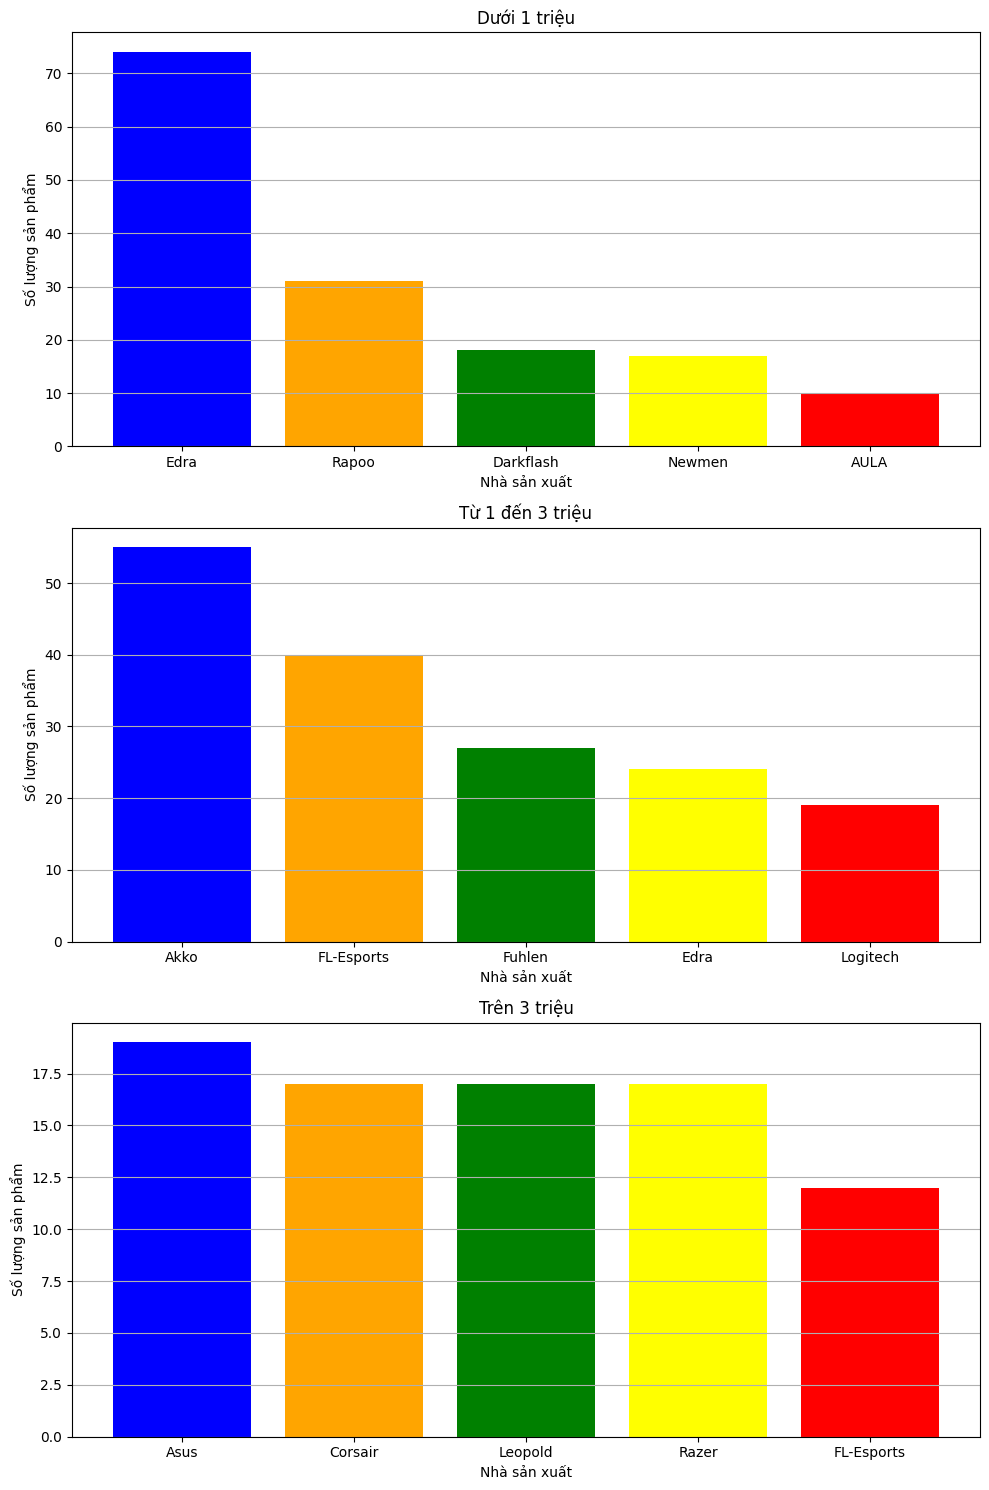

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Chia dữ liệu thành các phân khúc giá
data['Price Segment'] = pd.cut(data['Giá(đ)'], bins=[0, 1000000, 3000000, float('inf')], labels=['Dưới 1 triệu', 'Từ 1 đến 3 triệu', 'Trên 3 triệu'])

# Tính toán top 3 nhà sản xuất cho mỗi phân khúc giá
top_3_manufacturers = data.groupby(['Price Segment', 'Nhà sản xuất']).size().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')

# Vẽ biểu đồ
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for i, (segment, segment_data) in enumerate(top_3_manufacturers.groupby('Price Segment')):
    ax = axes[i]
    ax.bar(segment_data['Nhà sản xuất'], segment_data['Count'], color=['blue', 'orange', 'green','yellow','red'])
    ax.set_title(segment)
    ax.set_ylabel('Số lượng sản phẩm')
    ax.set_xlabel('Nhà sản xuất')
    ax.grid(axis='y')

plt.tight_layout()
plt.show()


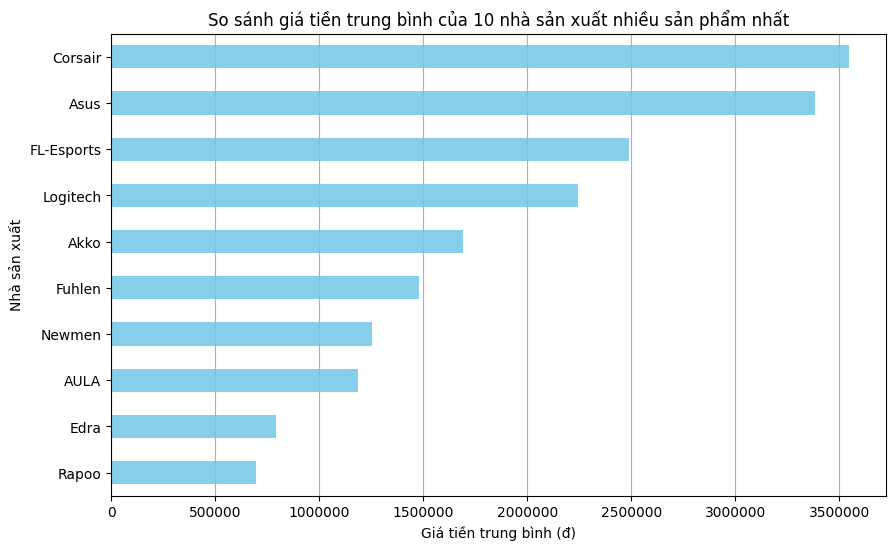

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Tính số lượng sản phẩm của mỗi nhà sản xuất
product_counts = data['Nhà sản xuất'].value_counts()

# Chọn ra 10 nhà sản xuất có số lượng sản phẩm nhiều nhất
top_10_manufacturers = product_counts.head(10).index

# Lọc dữ liệu chỉ chứa các sản phẩm từ 10 nhà sản xuất được chọn
top_10_data = data[data['Nhà sản xuất'].isin(top_10_manufacturers)]

# Tính giá tiền trung bình của mỗi nhà sản xuất trong danh sách 10 nhà sản xuất được chọn
average_prices = top_10_data.groupby('Nhà sản xuất')['Giá(đ)'].mean().sort_values()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
average_prices.plot(kind='barh', color='skyblue')
plt.xlabel('Giá tiền trung bình (đ)')
plt.ylabel('Nhà sản xuất')
plt.title('So sánh giá tiền trung bình của 10 nhà sản xuất nhiều sản phẩm nhất')
plt.grid(axis='x')
plt.ticklabel_format(style='plain', axis='x')

plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14368\519682844.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_segment_counts = filtered_data.groupby('Price Segment')['Kết nối'].value_counts(normalize=True).unstack(fill_value=0)


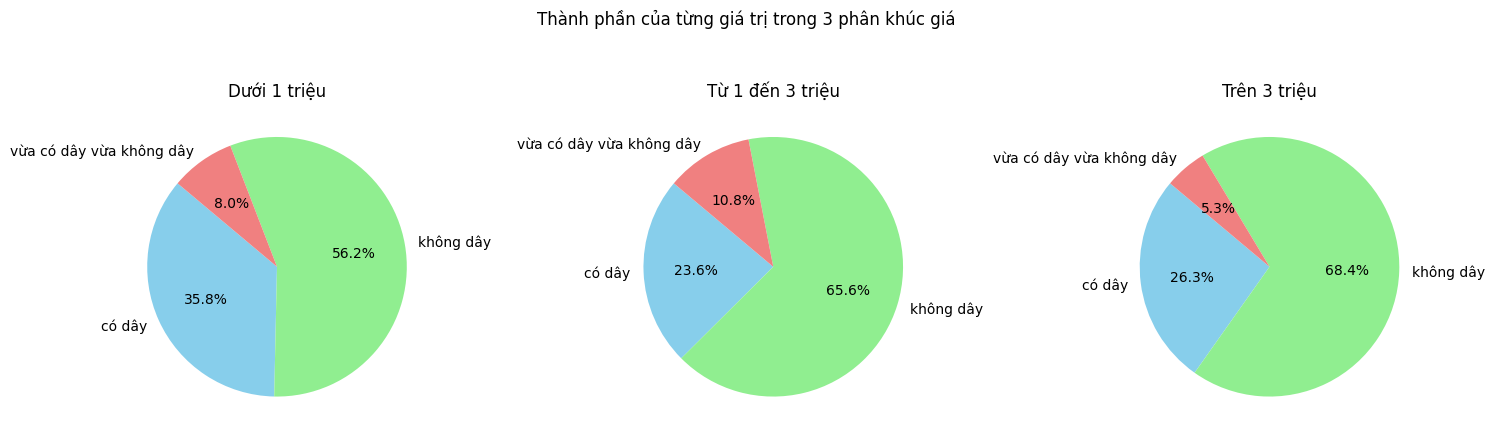

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('updated_data.csv')

# Tạo các phân khúc giá tiền
data['Price Segment'] = pd.cut(data['Giá(đ)'], bins=[0, 1000000, 3000000, float('inf')], labels=['Dưới 1 triệu', 'Từ 1 đến 3 triệu', 'Trên 3 triệu'])

# Lọc bỏ các mẫu có giá trị '0'
filtered_data = data[data['Kết nối'] != '0']

# Tính toán tỷ lệ phần trăm của từng giá trị trong mỗi phân khúc giá
price_segment_counts = filtered_data.groupby('Price Segment')['Kết nối'].value_counts(normalize=True).unstack(fill_value=0)

# Vẽ biểu đồ tròn
colors = ['skyblue', 'lightgreen', 'lightcoral']
labels = price_segment_counts.columns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (segment, counts) in enumerate(price_segment_counts.iterrows()):
    axes[i].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(segment)

plt.suptitle('Thành phần của từng giá trị trong 3 phân khúc giá ')
plt.tight_layout()
plt.show()
